## Observations and Insights 

## The pupolation of mise is evenly distributed between females (49.8%) and males (50.2%) 

## The data indicates that the weight of the mouse plays a part in the size of the tumor, the heavier the mouse the biger the tumor is likely to be.

## Mouse r157 saw their tumor decrease volume during their treatment with Capomulin, with a starting volume of 45mm at timepoint 0 to ~40.66 mm at time point 45. The lowest tumor volume recorded was  39.65mm at timepoint [20]

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = mouse_metadata.merge(study_results,left_on="Mouse ID", right_on="Mouse ID")
mouse_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mices
dup = ['Mouse ID','Timepoint']

mouse_data.value_counts(subset = dup )

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data.loc[mouse_data.duplicated(subset= dup), : ]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_mouse_db = mouse_data.drop_duplicates(subset = dup)

In [6]:
# Checking the number of mice in the clean DataFrame.

cln_mouse_db.duplicated(subset = dup).sum()

0

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_a = pd.DataFrame({"mean" : cln_mouse_db.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                  "median" : cln_mouse_db.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                 "variacne" : cln_mouse_db.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                 "standard deviation" : cln_mouse_db.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                 "SEM" : cln_mouse_db.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()})
summary_a

,mean,median,variacne,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_b = cln_mouse_db.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean' , 'median' , 'var' , 'std' , 'sem']})

summary_b

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, "Timpoint's Count")

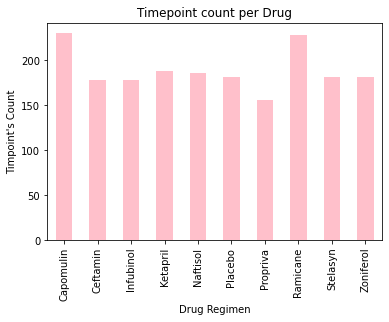

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_rg_cnt = cln_mouse_db.groupby("Drug Regimen")["Timepoint"].count()

barchart1 = drug_rg_cnt.plot(kind="bar", legend=False, title="Timepoint count per Drug", color="pink")
barchart1.set_ylabel("Timpoint's Count")


([<matplotlib.axis.XTick at 0x1cdad5b1160>,
 [Text(0.4, 0, 'Ramicane'),
  Text(1.4, 0, 'Capomulin'),
  Text(2.4, 0, 'Infubinol'),
  Text(3.4, 0, 'Placebo'),
  Text(4.4, 0, 'Ceftamin'),
  Text(5.4, 0, 'Stelasyn'),
  Text(6.4, 0, 'Zoniferol'),
  Text(7.4, 0, 'Ketapril'),
  Text(8.4, 0, 'Propriva'),
  Text(9.4, 0, 'Naftisol')])

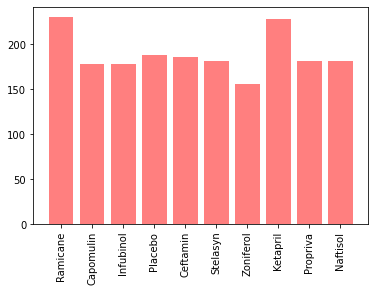

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drgregimen = cln_mouse_db['Drug Regimen'].unique()

x_axis = np.arange(len(drug_rg_cnt))
tick_locations = [value+0.4 for value in x_axis]


plt.bar(x_axis, drug_rg_cnt, color = "red", alpha = 0.5, align="edge" )
plt.xticks(tick_locations, drgregimen , rotation="vertical")


<AxesSubplot:title={'center':'Mise per Gender'}, ylabel='count'>

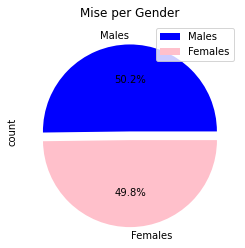

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
males = cln_mouse_db.loc[cln_mouse_db["Sex"] == "Male" , : ]['Mouse ID'].unique()
male_cnt = len(males)
females = cln_mouse_db.loc[cln_mouse_db["Sex"] == "Female" , : ]['Mouse ID'].unique()
female_cnt = len(females)

pd.DataFrame({"count" : [male_cnt , female_cnt]}, index =["Males" , "Females"]).plot.pie(y = "count", 
                                                                                                      title = "Mise per Gender", 
                                                                                                     autopct="%1.1f%%", 
                                                                                                     colors=["blue","pink"],
                                                                                                    explode=(0,0.1))





<function matplotlib.pyplot.show(close=None, block=None)>

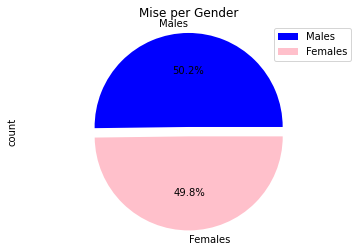

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Males" , "Females"]
count = [male_cnt,female_cnt]
colors = ["blue","pink"]
explode = (0, 0.1)

plt.title('Mise per Gender')
plt.pie(count, explode=explode, labels=gender, colors=colors,
       autopct="%1.1f%%")
plt.axis("equal")
plt.legend(['Males','Females'])
plt.ylabel("count")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



grouped_mouse = cln_mouse_db.loc[(cln_mouse_db["Drug Regimen"] == "Capomulin") | 
                                 (cln_mouse_db["Drug Regimen"] == "Ramicane") |
                                 (cln_mouse_db["Drug Regimen"] == "Infubinol") |
                                 (cln_mouse_db["Drug Regimen"] == "Ceftamin") ,
                                 : ].groupby("Mouse ID")

grp_mouse = pd.DataFrame(grouped_mouse["Timepoint"].max())
grp_mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cln_mouse_db2 = cln_mouse_db.merge(grp_mouse, how="outer", on="Mouse ID", suffixes=["","_max"])
cln_mouse_db2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint_max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1884,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1885,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1886,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
drugs = []
for drug in druglist:
    for row_index, row in cln_mouse_db2.iterrows():
        if row["Drug Regimen"] == drug:
            if row['Timepoint'] == row["Timepoint_max"]:
                tumor_vol = row['Tumor Volume (mm3)']
                mouse = row['Mouse ID']
                _max = row['Timepoint_max']
                print(f' for {drug} this mouse: {mouse}, presented a tumor size of {tumor_vol} at {_max} timepoint')
                print("appending to list ---------------------------------------------------------------------")
                tumor_volume.append(tumor_vol)
                drugs.append(drug) 

volume_df = pd.DataFrame({'drug' : drugs,
                         'Tumor Size' : tumor_volume})    

 for Capomulin this mouse: s185, presented a tumor size of 23.34359787 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Capomulin this mouse: x401, presented a tumor size of 28.48403281 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Capomulin this mouse: m601, presented a tumor size of 28.43096411 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Capomulin this mouse: f966, presented a tumor size of 30.48598484 at 20.0 timepoint
appending to list ---------------------------------------------------------------------
 for Capomulin this mouse: u364, presented a tumor size of 31.02392294 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Capomulin this mouse: y793, presented a tumor size of 31.8962384 at 45.0 timepoint
appending to list ---------

 for Infubinol this mouse: a203, presented a tumor size of 67.97341878 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Infubinol this mouse: a251, presented a tumor size of 65.52574285 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Infubinol this mouse: a577, presented a tumor size of 57.03186187 at 30.0 timepoint
appending to list ---------------------------------------------------------------------
 for Infubinol this mouse: a685, presented a tumor size of 66.08306589 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Infubinol this mouse: c139, presented a tumor size of 72.2267309 at 45.0 timepoint
appending to list ---------------------------------------------------------------------
 for Infubinol this mouse: c326, presented a tumor size of 36.3213458 at 5.0 timepoint
appending to list -----------

In [15]:
#Determine Outliers using the upper and lower bounds, then print the results
quartiles = cln_mouse_db2["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f' The Lower Bound to determine outliers is {lower_bound}')
print(f' The Upper Bound to determine outliers is {upper_bound}')      
print(f'----- *** -------- the following mise/tumor volume could represent outliers')
for drug in druglist:
    for row_index, row in cln_mouse_db2.iterrows():
        if row["Drug Regimen"] == drug:
            if row['Timepoint'] == row["Timepoint_max"]:
                tumor_vol = row['Tumor Volume (mm3)']
                if (tumor_vol < lower_bound) | (tumor_vol > upper_bound): 
                    mouse = row['Mouse ID']
                    print(f'mouse: {mouse}/ with tummor size {tumor_vol} is potentially an outlier')                 


 The Lower Bound to determine outliers is 28.01388733875001
 The Upper Bound to determine outliers is 73.31018776874998
----- *** -------- the following mise/tumor volume could represent outliers
mouse: s185/ with tummor size 23.34359787 is potentially an outlier
mouse: k403/ with tummor size 22.05012627 is potentially an outlier


In [16]:
volume_df.loc[volume_df["drug"] == "Capomulin" , : ]['Tumor Size'].unique()

array([23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294,
       31.8962384 , 32.37735684, 33.32909778, 34.45529799, 37.31184577,
       36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774,
       38.75326548, 38.1251644 , 39.95234669, 40.65812366, 40.1592203 ,
       40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617])

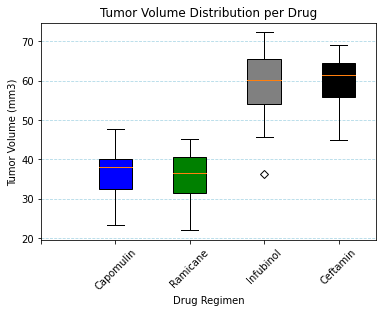

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
cap = volume_df.loc[volume_df["drug"] == "Capomulin" , : ]['Tumor Size'].unique()
ram = volume_df.loc[volume_df["drug"] == "Ramicane" , : ]['Tumor Size'].unique()
inf = volume_df.loc[volume_df["drug"] == "Infubinol" , : ]['Tumor Size'].unique()
cef = volume_df.loc[volume_df["drug"] == "Ceftamin" , : ]['Tumor Size'].unique()

fig1, ax1 = plt.subplots()
x_axis = np.arange(len(druglist)+1)
tick_locations = [value for value in x_axis]
ax1.set_title('Tumor Volume Distribution per Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
drugplot = ax1.boxplot([cap,ram,inf,cef], patch_artist=True)
ax1.yaxis.grid(True, linestyle="--", color="lightblue")
ax1.set(axisbelow=True)
plt.xticks(tick_locations, ["",'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], rotation = 45)
colors = ['blue','green','grey','black']
for patch, color in zip(drugplot['boxes'], colors):
        patch.set_facecolor(color)
plt.setp(drugplot['fliers'], color = 'blue', marker = "D")
plt.show()

## Line and Scatter Plots

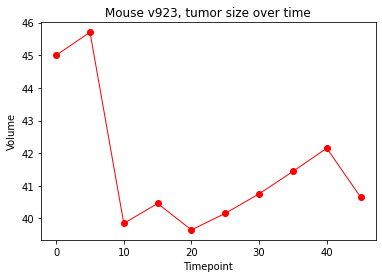

[45.0, 45.70443431, 39.84822328, 40.45798877, 39.64829568, 40.15641269, 40.75221626, 41.43924156, 42.1510148, 40.65812366]


In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Using this from the list printed above:

## for Capomulin this mouse: v923, presented a tumor size of 40.65812366 at 45.0 timepoint

#Set Mouse id in variable
mouse = "v923"

#filter clean data for only mouse data and create lists to handle the values for the line plot
mouse_data = cln_mouse_db2.loc[cln_mouse_db2["Mouse ID"] == mouse, : ]
tpoints = []
tumsize = []

#iterate through the mouse data to select values for lists and append them to the empty list created on top
for row_index, row in mouse_data.iterrows():
        tpoints.append(row["Timepoint"])
        tumsize.append(row["Tumor Volume (mm3)"])
        
#Plot the line plot

x_axis = tpoints

plt.title("Mouse v923, tumor size over time")
plt.xlabel("Timepoint")
plt.ylabel("Volume")
plt.plot(x_axis, tumsize, marker="o", color="red", linewidth=1)
plt.show()

print(tumsize)

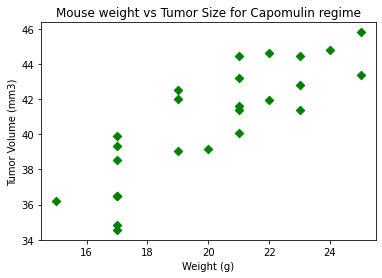

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg_tumsize = pd.DataFrame(cln_mouse_db2.loc[cln_mouse_db2['Drug Regimen'] == "Capomulin" , ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"] ].groupby("Mouse ID").mean(['Tumor Volume (mm3)','weight']))
        
plt.title("Mouse weight vs Tumor Size for Capomulin regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")      
plt.scatter(capomulin_avg_tumsize['Weight (g)'], capomulin_avg_tumsize['Tumor Volume (mm3)'], marker="D", color="green")
plt.show()



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
from scipy import stats

The r-squared is: 0.7088568047708723


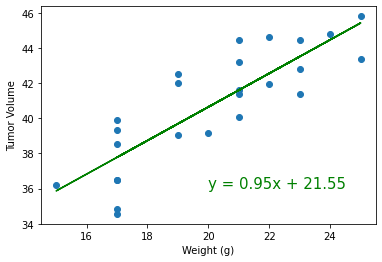

In [21]:
x_values = capomulin_avg_tumsize['Weight (g)']
y_values = capomulin_avg_tumsize['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color="green")
plt.annotate(line_eq,(20,36),fontsize=15,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()